In [34]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from rdkit import Chem
from rdkit.Chem import Descriptors
# pd.set_option('display.max_rows', None)

In [24]:
# h298_df = pd.read_csv('tests/data/gdb11_0.001.csv')
h298_df = pd.read_csv('tests/data/gdb11_0.01.csv')
h298_df.describe()

,h298
count,71161.000000
mean,-1.357522
std,59.770424
min,-343.774000
25%,-40.303000
50%,0.903000
75%,40.292000
max,253.086000


In [35]:
# calculate statistics for molecular weight of smiles in h298_df using Descriptors.ExactMolWt()
h298_df['MW'] = h298_df['smiles'].apply(lambda x: Descriptors.ExactMolWt(Chem.MolFromSmiles(x)))
h298_df['MW'].describe()

count    71161.000000
mean       150.845469
std          7.529037
min         72.021129
25%        149.120449
50%        153.078979
75%        155.131014
max        174.050379
Name: MW, dtype: float64

In [25]:
# specify the root directory
root_dir = 'results'

dfs = []

# iterate over the directories in the root directory
for subdir in os.listdir(root_dir):
    subdir_path = os.path.join(root_dir, subdir)
    if os.path.isdir(subdir_path):
        
        # specify important files in the subdirectory
        json_path = os.path.join(subdir_path, "args.json")
        csv_path = os.path.join(subdir_path, "test_metrics.csv")
        
        # read in args.json
        with open(json_path, 'r') as f:
            json_data = json.load(f)
        json_df = pd.DataFrame({k:[v] for k, v in json_data.items()})
        
        # read in test_metrics.csv
        try:
            csv_df = pd.read_csv(csv_path)
        except FileNotFoundError:  # if job didn't finish, there'll be no CSV
            continue
        
        # concatentate horizontally
        df = pd.DataFrame({"directory": [subdir]})
        df = pd.concat([df, json_df, csv_df], axis=1)
        dfs.append(df)
                    
# combine the data into a single DataFrame
df = pd.concat(dfs, ignore_index=True)
df.drop(columns=['data_file', 'hf_col_name', 'lf_col_name', 'save_test_plot', 
                 'num_epochs', 'export_train_and_val', 'scale_data',
                 'split_type','results_dir'], inplace=True)
df.sort_values(by=['model_type', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf', 'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio'])

,directory,model_type,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
11,2023-09-19_17-21-46.286380,multi_fidelity,0,0.0,0.0,0.0,1,False,2,1.684742,3.173187,0.997208,2.221555,3.391400,0.996811
32,2023-09-19_12-21-41.476888,multi_fidelity,0,0.0,0.0,0.0,1,True,0,1.921148,3.029037,0.997372,1.841093,2.986177,0.997446
63,2023-09-19_09-09-34.227720,multi_fidelity,0,0.0,0.0,0.0,1,True,1,1.865679,2.818932,0.997777,1.791780,2.817676,0.997779
99,2023-09-19_18-47-23.636411,multi_fidelity,0,0.0,0.0,0.0,1,False,2,1.897092,3.496962,0.996609,2.024576,3.384475,0.996824
115,2023-09-19_18-10-46.007638,multi_fidelity,0,0.0,0.0,0.0,1,False,2,2.757621,3.918567,0.995742,1.855517,3.321947,0.996940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2023-09-19_16-38-55.462134,multi_target,3,0.0,0.0,0.0,100,False,1,4.758343,6.424643,0.988456,15520.450057,28302.994956,0.959924
440,2023-09-19_10-53-34.841354,multi_target,3,0.0,0.0,0.0,100,False,0,6.022439,8.118049,0.981126,9308.535459,20336.373549,0.935229
301,2023-09-19_09-11-25.912371,single_fidelity,0,0.0,0.0,0.0,1,True,2,1.622750,3.226493,0.997113,NaN,NaN,NaN
311,2023-09-19_08-55-47.379651,single_fidelity,0,0.0,0.0,0.0,1,True,0,1.852313,3.065437,0.997309,NaN,NaN,NaN


In [26]:
df.loc[(df['model_type'] == 'multi_fidelity') & (df['add_pn_bias_to_make_lf'] == 0) & (df['add_constant_bias_to_make_lf'] == 0) & (df['add_gauss_noise_to_make_lf'] == 0) & \
       (df['add_descriptor_bias_to_make_lf'] == 0) & (df['lf_hf_size_ratio'] == 100) \
       & (df['lf_superset_of_hf'] == True) & (df['seed'] == 0)]

,directory,model_type,add_pn_bias_to_make_lf,add_constant_bias_to_make_lf,add_gauss_noise_to_make_lf,add_descriptor_bias_to_make_lf,lf_hf_size_ratio,lf_superset_of_hf,seed,MAE_hf,RMSE_hf,R2_hf,MAE_lf,RMSE_lf,R2_lf
184,2023-09-19_13-12-27.241007,multi_fidelity,0,0.0,0.0,0.0,100,True,0,2.896598,3.862684,0.995727,4.157725,5.524620,0.991259
224,2023-09-19_11-25-11.949021,multi_fidelity,0,0.0,0.0,0.0,100,True,0,1.915781,3.101842,0.997245,3.857792,5.804542,0.990351
269,2023-09-19_12-41-04.420214,multi_fidelity,0,0.0,0.0,0.0,100,True,0,2.068248,3.160609,0.997139,3.309290,4.312947,0.994673
318,2023-09-19_11-59-36.991788,multi_fidelity,0,0.0,0.0,0.0,100,True,0,2.508856,3.552784,0.996385,2.109544,3.552292,0.996386


In [27]:
# df[df.duplicated(['model_type', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
#             'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf','seed'])]

In [28]:
# df.loc[(df['model_type'] == 'multi_fidelity') & (df['add_pn_bias_to_make_lf'] == 0) & (df['add_constant_bias_to_make_lf'] == 0) & (df['add_gauss_noise_to_make_lf'] == 0) & (df['add_descriptor_bias_to_make_lf'] == 0) & (df['lf_hf_size_ratio'] == 1) \
#        & (df['lf_superset_of_hf'] == True) & (df['seed'] == 0)]

In [29]:
df_mean = df.drop(columns=['directory']).groupby(['model_type', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf']).mean().reset_index()
df_std = df.drop(columns=['directory']).groupby(['model_type', 'add_pn_bias_to_make_lf', 'add_constant_bias_to_make_lf',
            'add_gauss_noise_to_make_lf', 'add_descriptor_bias_to_make_lf', 'lf_hf_size_ratio', 'lf_superset_of_hf']).std().reset_index()

In [30]:
df_mean.model_type.value_counts()

model_type
multi_fidelity                   60
multi_target                     60
multi_fidelity_weight_sharing     5
single_fidelity                   1
Name: count, dtype: int64

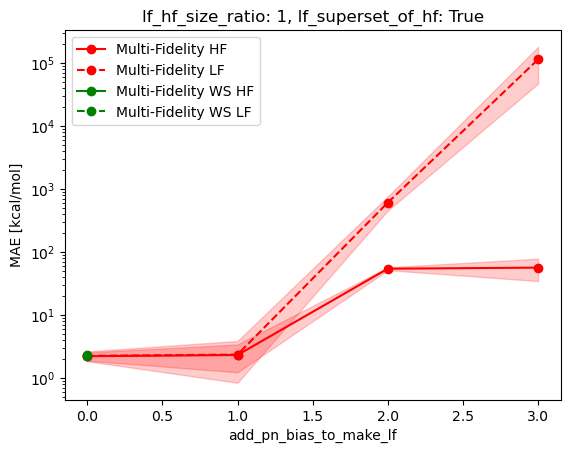

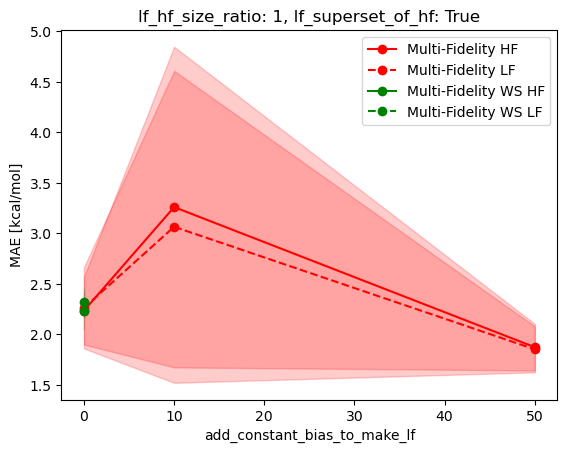

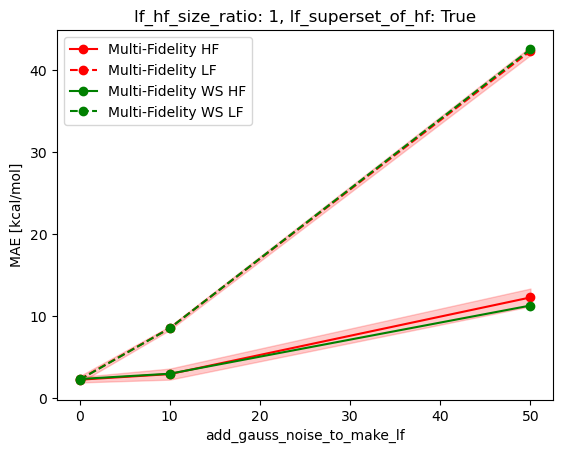

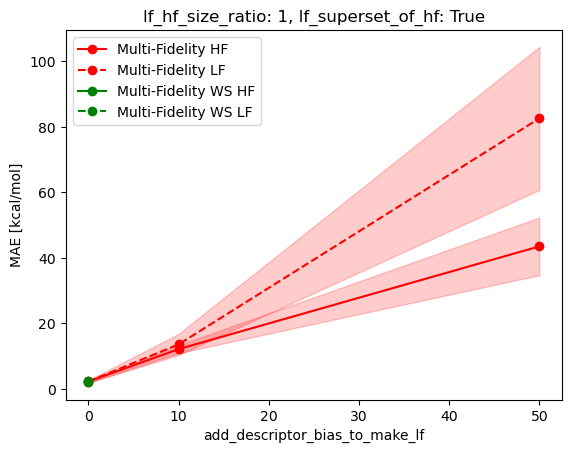

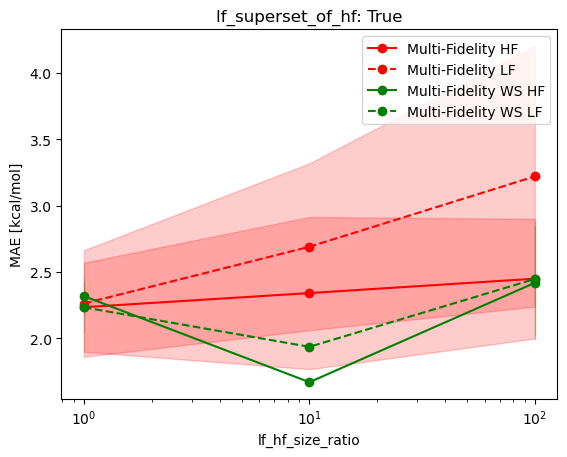

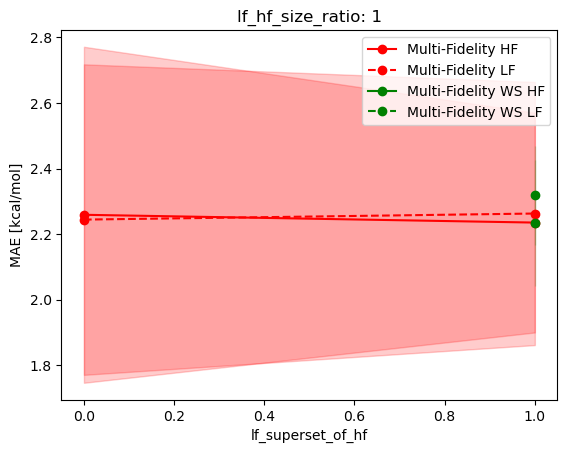

In [31]:
models_colors_dict = {
    'single_fidelity': 'k',
    'multi_target': 'b',
    'multi_fidelity': 'r',
    'multi_fidelity_weight_sharing': 'g',
}

model_type_dict = {
    'multi_target': 'Multi-Target',
    'multi_fidelity': 'Multi-Fidelity',
    'multi_fidelity_weight_sharing': 'Multi-Fidelity WS',
}

for lf_hf_size_ratio in [1]:  # , 10, 100]:
    for lf_superset_of_hf in [True]:  # , False]:
        default_var_values = {
            'add_pn_bias_to_make_lf': 0, 
            'add_constant_bias_to_make_lf': 0.0, 
            'add_gauss_noise_to_make_lf': 0.0,	
            'add_descriptor_bias_to_make_lf': 0.0, 
            'lf_hf_size_ratio': lf_hf_size_ratio,
            'lf_superset_of_hf': lf_superset_of_hf,
        }

        for current_var in default_var_values.keys():
            not_current_var_default_values = {k:v for k,v in default_var_values.items() if k != current_var}

            df_mean_ = df_mean.loc[(df_mean[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]
            df_std_ = df_std.loc[(df_std[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]

            # TODO: add lower bound baseline for single fidelity with 10% of the data at HF
            # this single fidelity isn't a great baseline because it assumes having 100% of the data at HF (this is a best case-scenario, also need lower bound)
            # plt.hlines(df_.loc[df_.model_type == 'single_fidelity'].MAE_hf, min(df_[current_var]), max(df_[current_var]), 'k', label='single_fidelity')

            for model_type in [
                # 'multi_target', 
                'multi_fidelity', 
                'multi_fidelity_weight_sharing',
            ]:
                df_mean__ = df_mean_.loc[df_mean_.model_type == model_type].sort_values(by=current_var)
                df_std__ = df_std_.loc[df_std_.model_type == model_type].sort_values(by=current_var)
                plt.plot(df_mean__[current_var], df_mean__.MAE_hf, 'o-'+models_colors_dict[model_type], label=model_type_dict[model_type]+' HF')
                plt.fill_between(df_mean__[current_var], df_mean__.MAE_hf - df_std__.MAE_hf, df_mean__.MAE_hf + df_std__.MAE_hf, alpha=0.2, color=models_colors_dict[model_type])
                plt.plot(df_mean__[current_var], df_mean__.MAE_lf, 'o--'+models_colors_dict[model_type], label=model_type_dict[model_type]+' LF')
                plt.fill_between(df_mean__[current_var], df_mean__.MAE_lf - df_std__.MAE_lf, df_mean__.MAE_lf + df_std__.MAE_lf, alpha=0.2, color=models_colors_dict[model_type])

            if current_var == 'lf_hf_size_ratio':
                plt.xscale('log')

            if current_var == 'add_pn_bias_to_make_lf':
                plt.yscale('log')
            
            plt.legend()
            plt.xlabel(current_var)
            plt.ylabel('MAE [kcal/mol]')

            if current_var == 'lf_hf_size_ratio':
                plt.title(f"lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
            elif current_var == 'lf_superset_of_hf':
                plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}")
            else:
                plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}, lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
            # plt.legend(fontsize=14)
            # plt.xlabel('LF:HF Dataset Size Ratio', fontsize=16)
            # plt.ylabel('MAE [kcal/mol]', fontsize=16)
            # plt.xticks(fontsize=14)
            # plt.yticks(fontsize=14)
            plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.png")
            plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.pdf")
            plt.show()

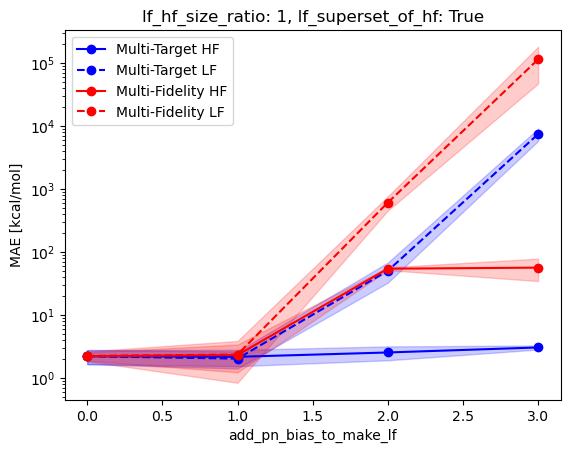

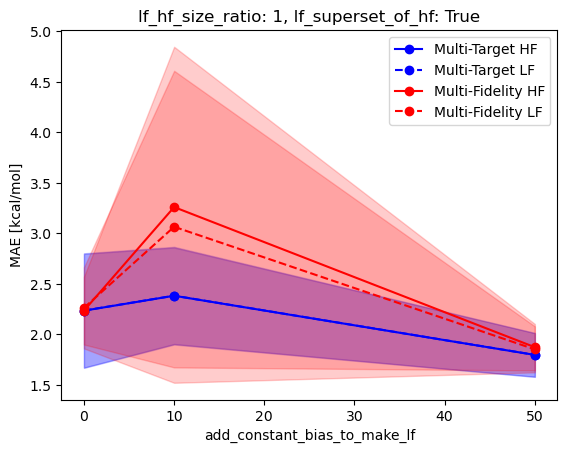

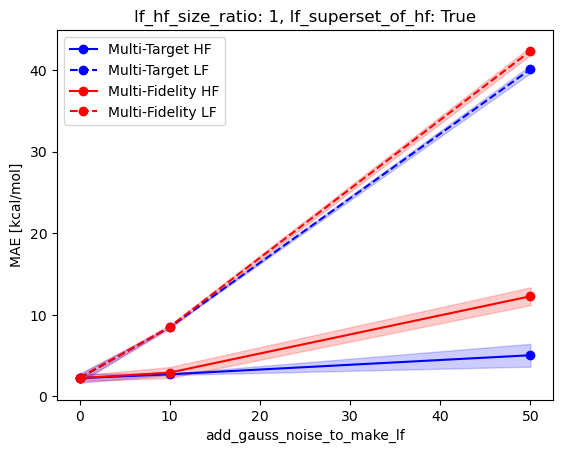

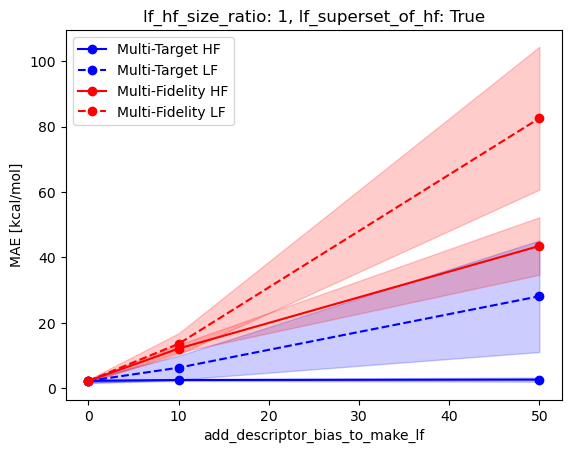

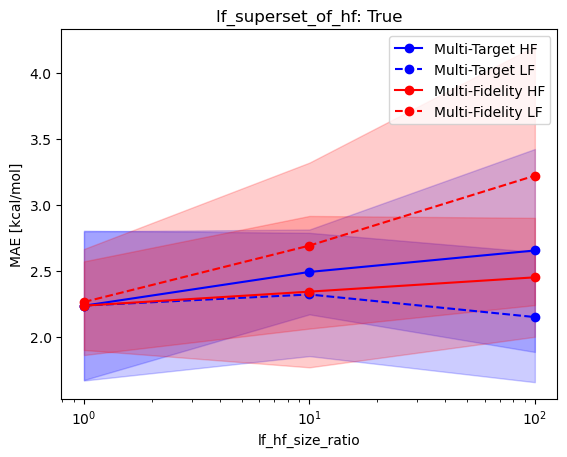

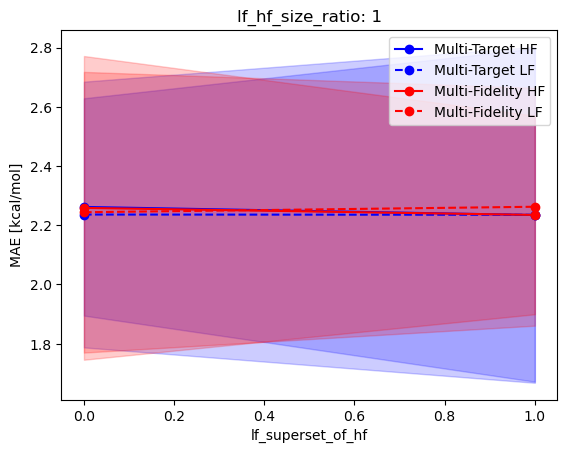

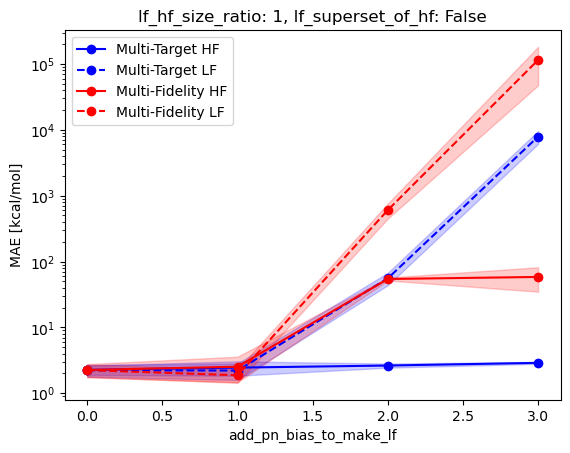

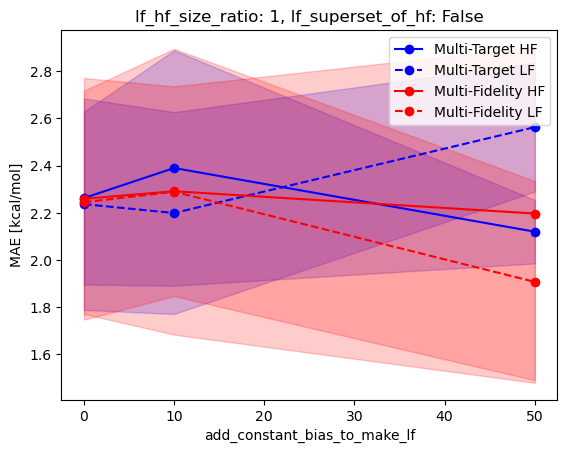

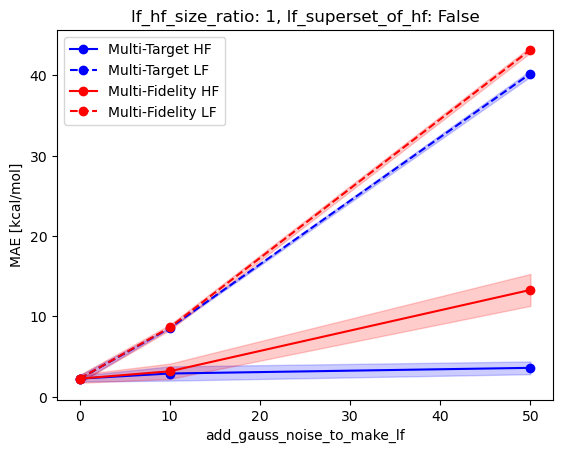

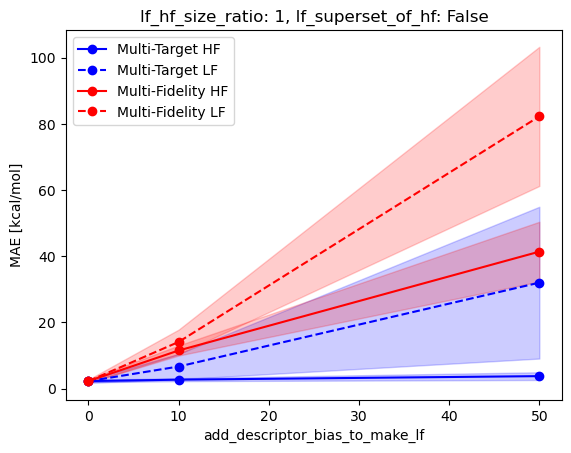

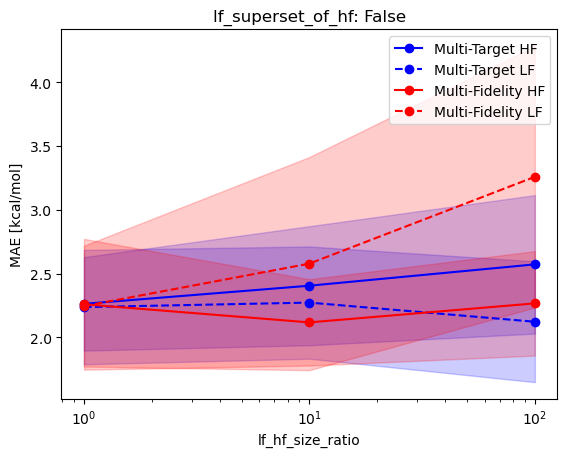

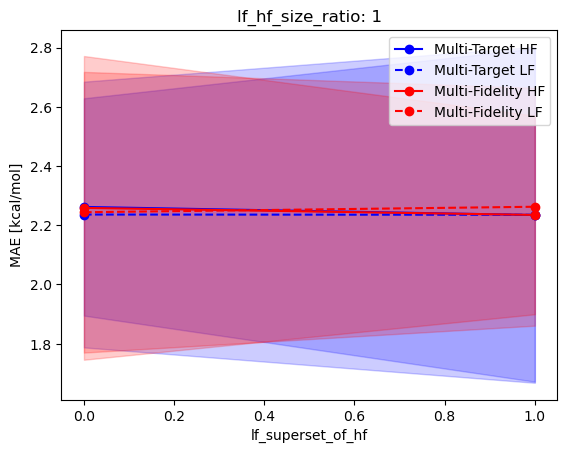

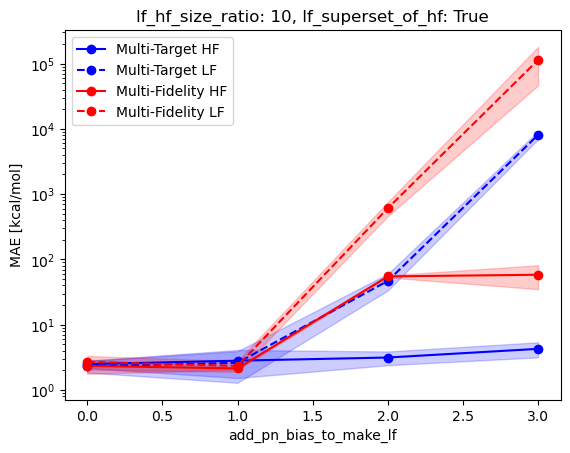

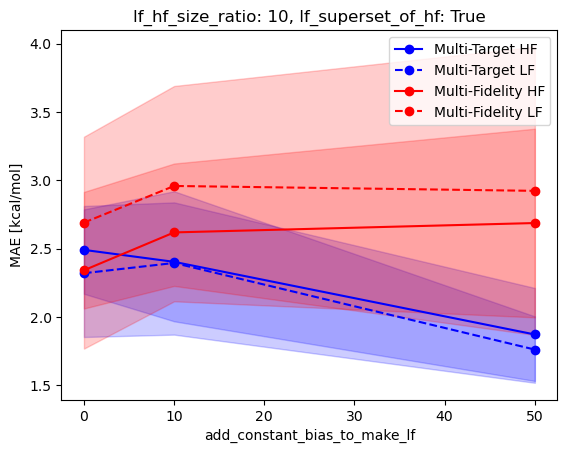

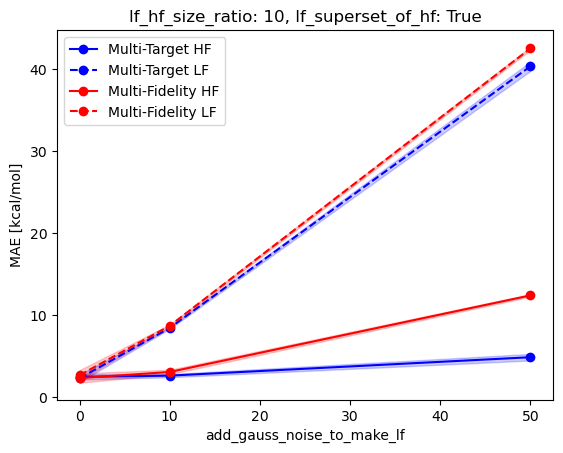

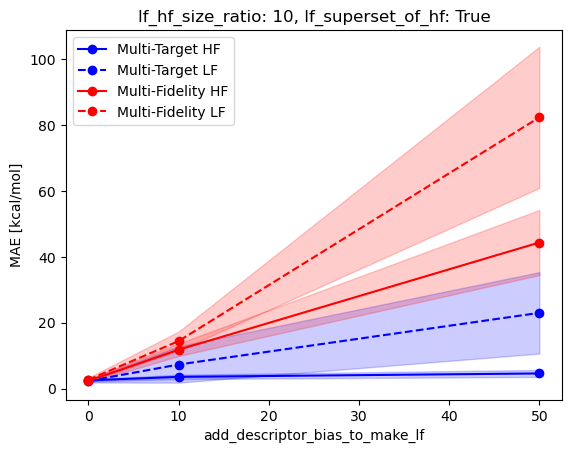

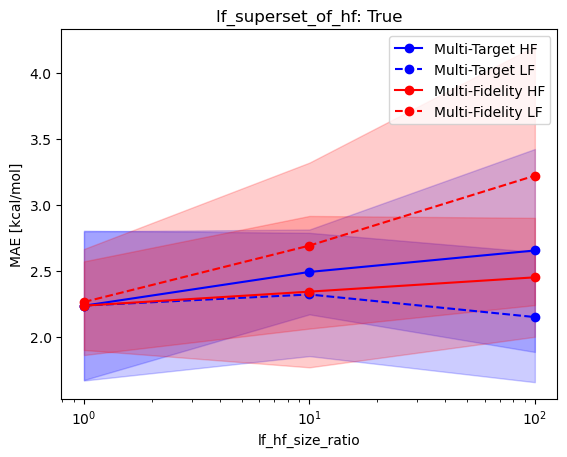

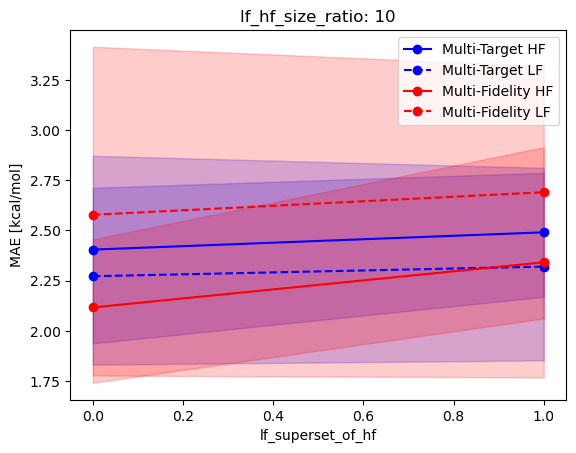

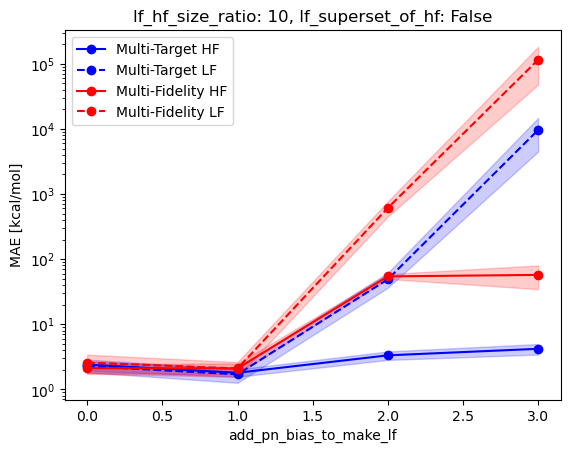

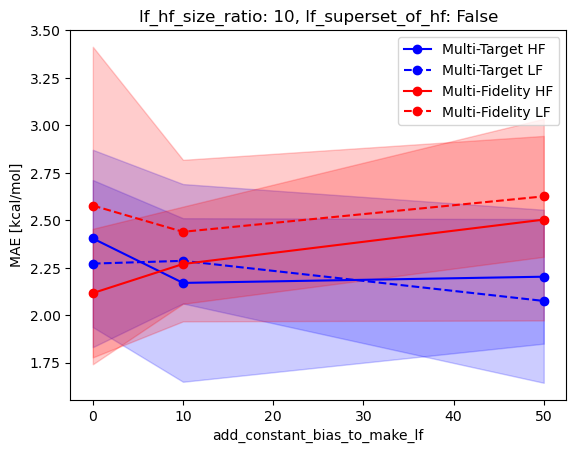

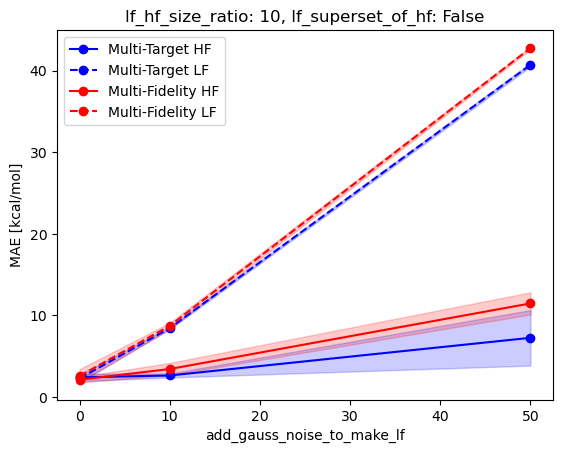

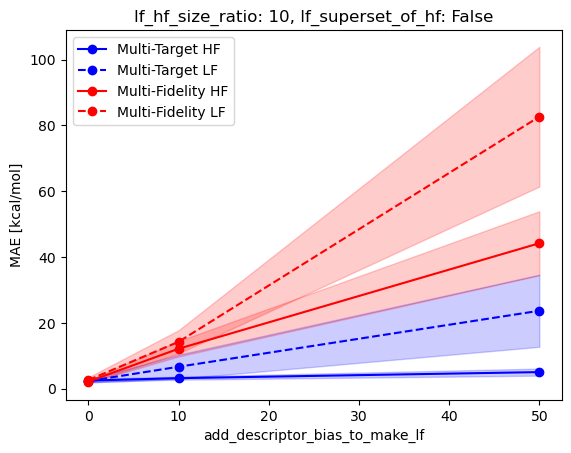

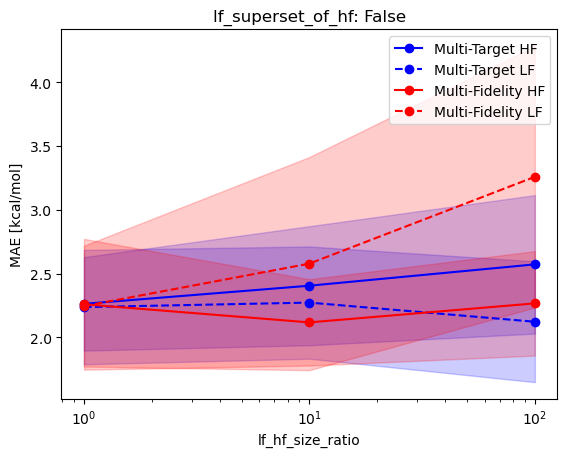

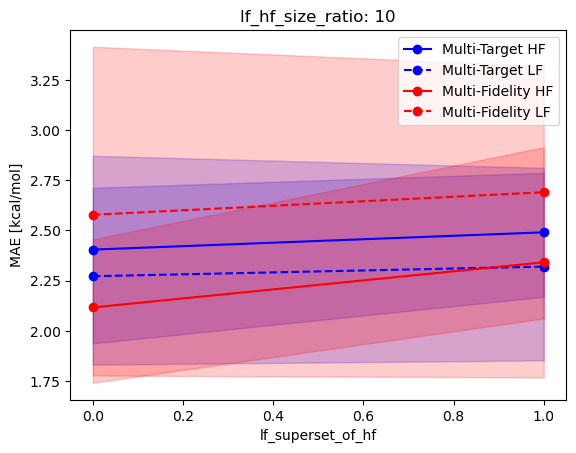

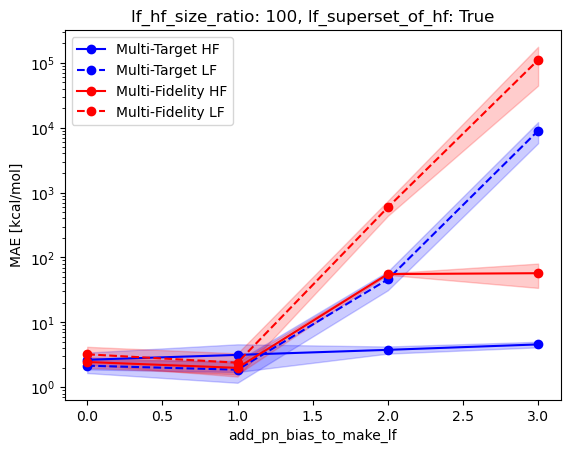

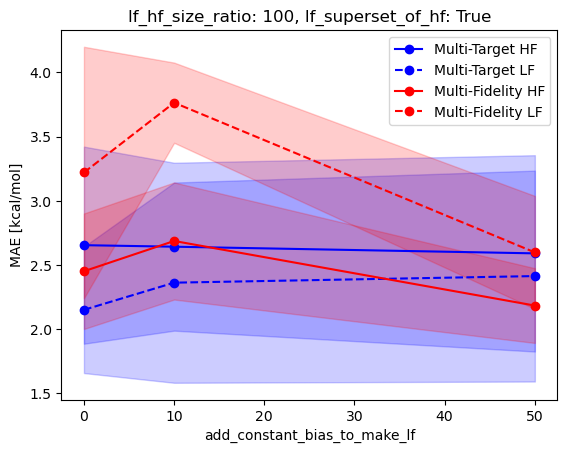

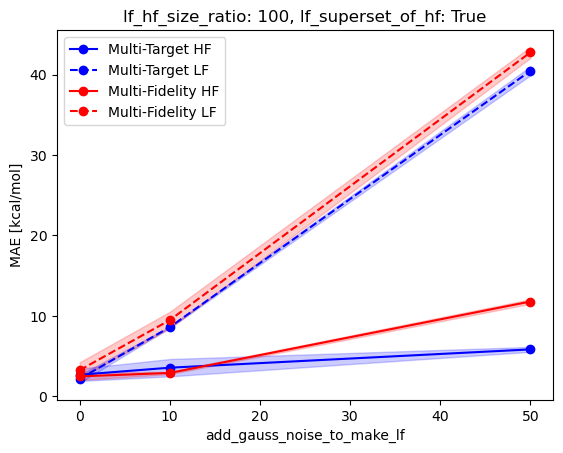

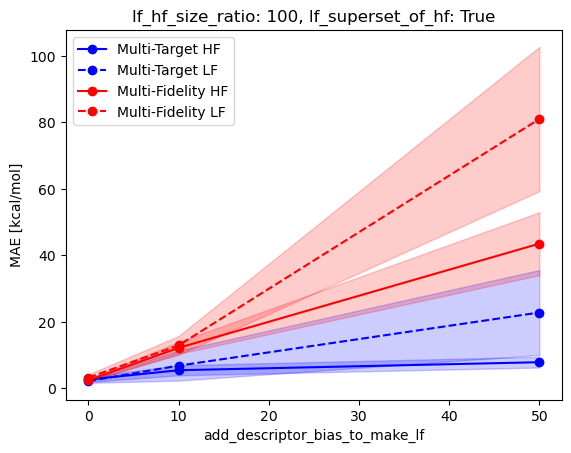

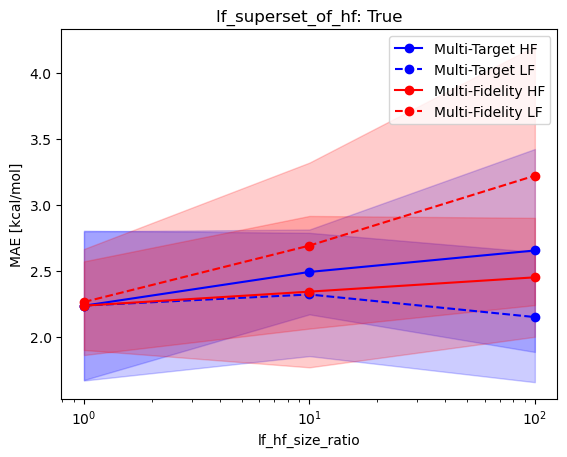

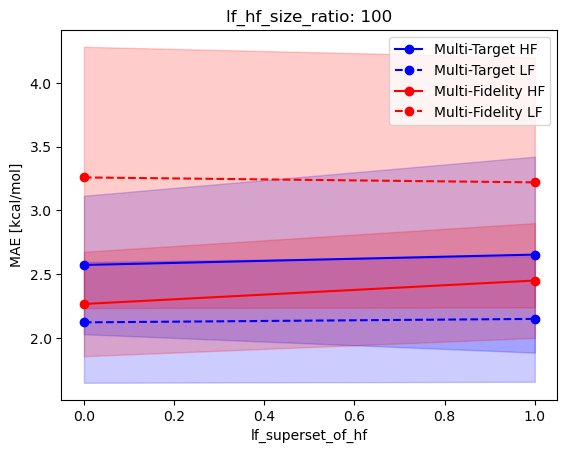

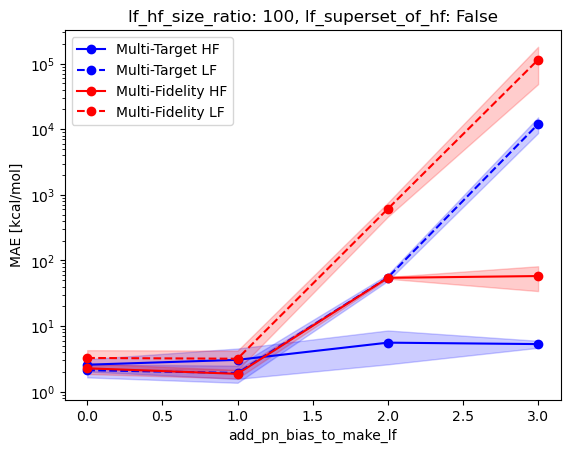

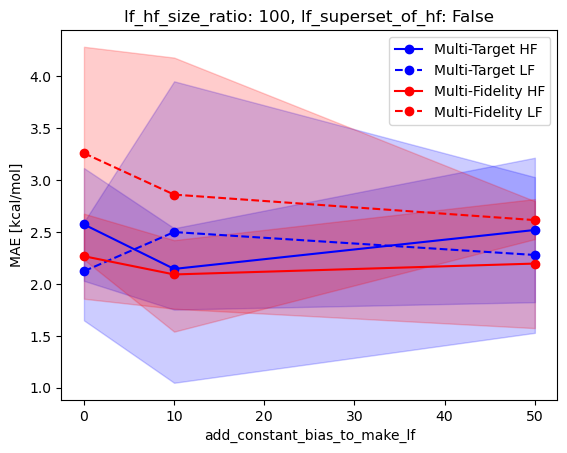

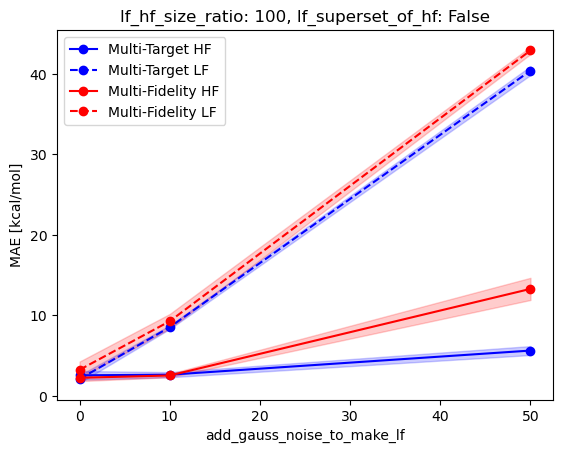

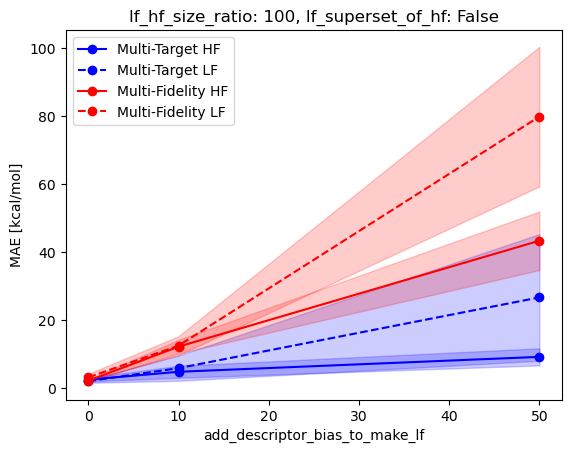

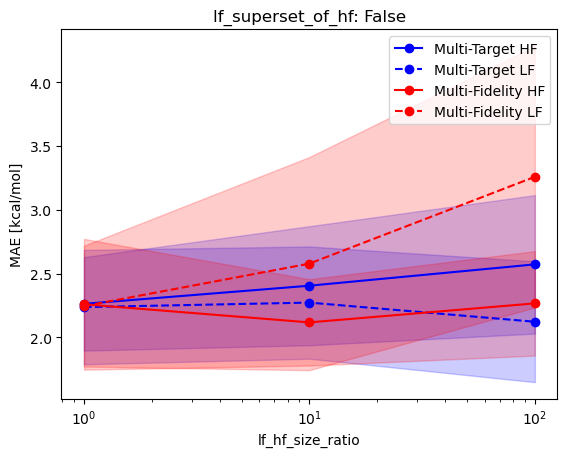

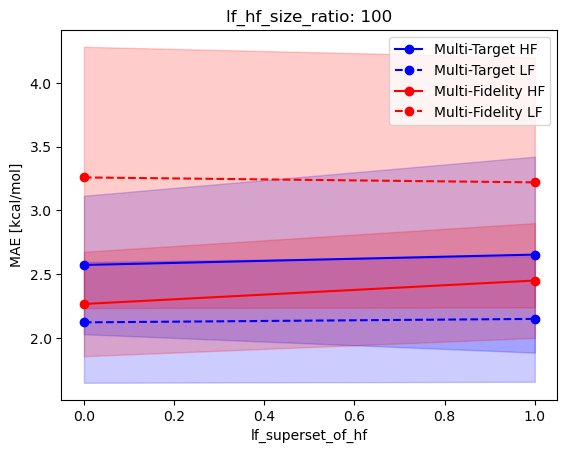

In [32]:
models_colors_dict = {
    'single_fidelity': 'k',
    'multi_target': 'b',
    'multi_fidelity': 'r',
    'multi_fidelity_weight_sharing': 'g',
}

model_type_dict = {
    'multi_target': 'Multi-Target',
    'multi_fidelity': 'Multi-Fidelity',
    'multi_fidelity_weight_sharing': 'Multi-Fidelity WS',
}

for lf_hf_size_ratio in [1, 10, 100]:
    for lf_superset_of_hf in [True, False]:
        default_var_values = {
            'add_pn_bias_to_make_lf': 0, 
            'add_constant_bias_to_make_lf': 0.0, 
            'add_gauss_noise_to_make_lf': 0.0,	
            'add_descriptor_bias_to_make_lf': 0.0, 
            'lf_hf_size_ratio': lf_hf_size_ratio,
            'lf_superset_of_hf': lf_superset_of_hf,
        }

        for current_var in default_var_values.keys():
            not_current_var_default_values = {k:v for k,v in default_var_values.items() if k != current_var}

            df_mean_ = df_mean.loc[(df_mean[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]
            df_std_ = df_std.loc[(df_std[list(not_current_var_default_values)] == pd.Series(not_current_var_default_values)).all(axis=1)]

            # TODO: add lower bound baseline for single fidelity with 10% of the data at HF
            # this single fidelity isn't a great baseline because it assumes having 100% of the data at HF (this is a best case-scenario, also need lower bound)
            # plt.hlines(df_.loc[df_.model_type == 'single_fidelity'].MAE_hf, min(df_[current_var]), max(df_[current_var]), 'k', label='single_fidelity')

            for model_type in [
                'multi_target', 
                'multi_fidelity', 
                # 'multi_fidelity_weight_sharing',
            ]:
                df_mean__ = df_mean_.loc[df_mean_.model_type == model_type].sort_values(by=current_var)
                df_std__ = df_std_.loc[df_std_.model_type == model_type].sort_values(by=current_var)
                plt.plot(df_mean__[current_var], df_mean__.MAE_hf, 'o-'+models_colors_dict[model_type], label=model_type_dict[model_type]+' HF')
                plt.fill_between(df_mean__[current_var], df_mean__.MAE_hf - df_std__.MAE_hf, df_mean__.MAE_hf + df_std__.MAE_hf, alpha=0.2, color=models_colors_dict[model_type])
                plt.plot(df_mean__[current_var], df_mean__.MAE_lf, 'o--'+models_colors_dict[model_type], label=model_type_dict[model_type]+' LF')
                plt.fill_between(df_mean__[current_var], df_mean__.MAE_lf - df_std__.MAE_lf, df_mean__.MAE_lf + df_std__.MAE_lf, alpha=0.2, color=models_colors_dict[model_type])

            if current_var == 'lf_hf_size_ratio':
                plt.xscale('log')

            if current_var == 'add_pn_bias_to_make_lf':
                plt.yscale('log')
            
            plt.legend()
            plt.xlabel(current_var)
            plt.ylabel('MAE [kcal/mol]')

            if current_var == 'lf_hf_size_ratio':
                plt.title(f"lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
            elif current_var == 'lf_superset_of_hf':
                plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}")
            else:
                plt.title(f"lf_hf_size_ratio: {default_var_values['lf_hf_size_ratio']}, lf_superset_of_hf: {default_var_values['lf_superset_of_hf']}")
            # plt.legend(fontsize=14)
            # plt.xlabel('LF:HF Dataset Size Ratio', fontsize=16)
            # plt.ylabel('MAE [kcal/mol]', fontsize=16)
            # plt.xticks(fontsize=14)
            # plt.yticks(fontsize=14)
            plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.png")
            plt.savefig(f"{current_var}_{default_var_values['lf_hf_size_ratio']}_{default_var_values['lf_superset_of_hf']}.pdf")
            plt.show()